In [1]:
import pathlib
import re

import geopandas as gpd
import pandas as pd
import networkx as nx
import shapely

import matplotlib.pyplot as plt

In [2]:
data_dir = pathlib.Path('~/data/euris').expanduser()
version = 'v0.1.0'

In [57]:
node_path = data_dir / f'nodes-{version}.geojson'
section_path = data_dir / f'sections-{version}.geojson'
export_node_path = data_dir / f'export-nodes-{version}.geojson'
export_edge_path = data_dir / f'export-edges-{version}.geojson'

In [4]:
section_gdf = gpd.read_file(section_path)
node_gdf = gpd.read_file(node_path)

In [5]:
node_section = section_gdf[['code']].merge(
    node_gdf[['sectionref', 'node_id']], 
    left_on='code', 
    right_on='sectionref'
)[['sectionref', 'node_id']]
node_section

,sectionref,node_id
0,HU0000100001,HU_J0001
1,HU0000100001,HU_J0002
2,HU0000100002,HU_J0002
3,HU0000100002,HU_J0003
4,HU0000100003,HU_J0003
...,...,...
13473,RO0000123700,RO_19750
13474,RO00001D7500,RO_D5940
13475,RO00001D7500,RO_D7500
13476,RO00005C1160,RO_C1000


In [6]:
left_df = node_section.groupby('sectionref').first()
right_df = node_section.groupby('sectionref').last()

In [7]:
edge_df = pd.merge(left_df, right_df, left_index=True, right_index=True, suffixes=['_from', '_to'])
edge_df = edge_df.rename(columns={"node_id_from": "source", "node_id_to": "target"})
edge_df

,source,target
sectionref,,
AT0000100001,AT_J0035,AT_J0072
AT0000100002,AT_J0002,AT_J0074
AT0000100003,AT_J0023,AT_J0053
AT0000100004,AT_J0053,AT_J0054
AT0000100005,AT_J0054,AT_J0027
...,...,...
SK0000100014,SK_J0006,SK_J0007
SK0000100015,SK_J0007,SK_J0008
SK0000100016,SK_J0022,SK_J0018


In [9]:
section_gdf = section_gdf.merge(edge_df.reset_index(), left_on='code', right_on='sectionref')
section_gdf

,name,name_cb,cntrycode,cntrycode_cb,fw_code,fw_code_cb,seq_nr,seq_nr_cb,code_cb,ww_name,...,active,ww_charges,remark,istentec,code,path,geometry,sectionref,source,target
0,Duna,None,HU,None,00001,None,00001,None,None,Duna,...,1,0.0,None,NaN,HU0000100001,FairwaySection_HU_20241118.geojson,"LINESTRING (18.8142 45.9087, 18.8131 45.9093, ...",HU0000100001,HU_J0001,HU_J0002
1,Duna,None,HU,None,00001,None,00002,None,None,Duna,...,1,0.0,None,NaN,HU0000100002,FairwaySection_HU_20241118.geojson,"LINESTRING (18.9228 46.1781, 18.9233 46.1788, ...",HU0000100002,HU_J0002,HU_J0003
2,Duna,None,HU,None,00001,None,00003,None,None,Duna,...,1,0.0,None,NaN,HU0000100003,FairwaySection_HU_20241118.geojson,"LINESTRING (18.9699 47.0256, 18.9701 47.0247, ...",HU0000100003,HU_J0003,HU_J0004
3,Duna,None,HU,None,00001,None,00004,None,None,Duna,...,1,0.0,None,NaN,HU0000100004,FairwaySection_HU_20241118.geojson,"LINESTRING (19.0509 47.437, 19.0506 47.4361, 1...",HU0000100004,HU_J0004,HU_J0005
4,Duna,None,HU,None,00001,None,00005,None,None,Duna,...,1,0.0,None,NaN,HU0000100005,FairwaySection_HU_20241118.geojson,"LINESTRING (19.0518 47.4395, 19.0515 47.4387, ...",HU0000100005,HU_J0005,HU_J0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,Danube 975-964 (RS-RO),None,RO,RS,00001,00001,97500,09750,RS0000109750,Dunărea,...,1,NaN,None,NaN,RO0000197500,FairwaySection_RO_20250225.geojson,"LINESTRING (22.24378 44.57789, 22.24378 44.577...",RO0000197500,RO_97500,RO_96400
6735,Danube 55.6 - 0,None,RO,None,00001,None,05560,None,None,Dunărea,...,1,NaN,None,NaN,RO0000105560,FairwaySection_RO_20250225.geojson,"LINESTRING (29.66123 45.15725, 29.66123 45.157...",RO0000105560,RO_00000,RO_05560
6736,Danube 237 - 197.5,None,RO,None,00001,None,23700,None,None,Dunărea,...,1,NaN,None,NaN,RO0000123700,FairwaySection_RO_20250225.geojson,"LINESTRING (27.9029 45.05694, 27.90235 45.0561...",RO0000123700,RO_23700,RO_19750
6737,Danube 1075-1059.4 (RS-RO),None,RO,RS,00001,00001,D7500,10750,RS0000110750,Dunărea,...,1,NaN,None,NaN,RO00001D7500,FairwaySection_RO_20250225.geojson,"LINESTRING (21.35978 44.82056, 21.36016 44.820...",RO00001D7500,RO_D5940,RO_D7500


In [10]:

# check if all nodes are at the same location
# almost, just one junction in belgium is not
(
    node_gdf
    .groupby(['objectcode', 'countrycode'])
    .agg({
        "geometry": lambda x: shapely.MultiPoint(x).convex_hull.area
    })
    .sort_values('geometry', ascending=False)
)



geometry
objectcode countrycode              
J8219      BE           5.000000e-17
00000      RO           0.000000e+00
J3127      DE           0.000000e+00
J3132      DE           0.000000e+00
J3131      NL           0.000000e+00
...                              ...
J1418      NL           0.000000e+00
           FR           0.000000e+00
J1417      NL           0.000000e+00
           FR           0.000000e+00
W3531      BE           0.000000e+00

[6223 rows x 1 columns]

In [11]:
graph = nx.from_pandas_edgelist(section_gdf, edge_attr=True)

In [12]:
for _, row in node_gdf.iterrows():
    n = row['node_id']
    node = graph.nodes[n]
    # add a list of euris nodes associated with this node
    euris_nodes = node.get('euris_nodes', [])
    euris_nodes.append(row.to_dict())
    node['euris_nodes'] = euris_nodes
    # and last property
    node.update(row.to_dict())

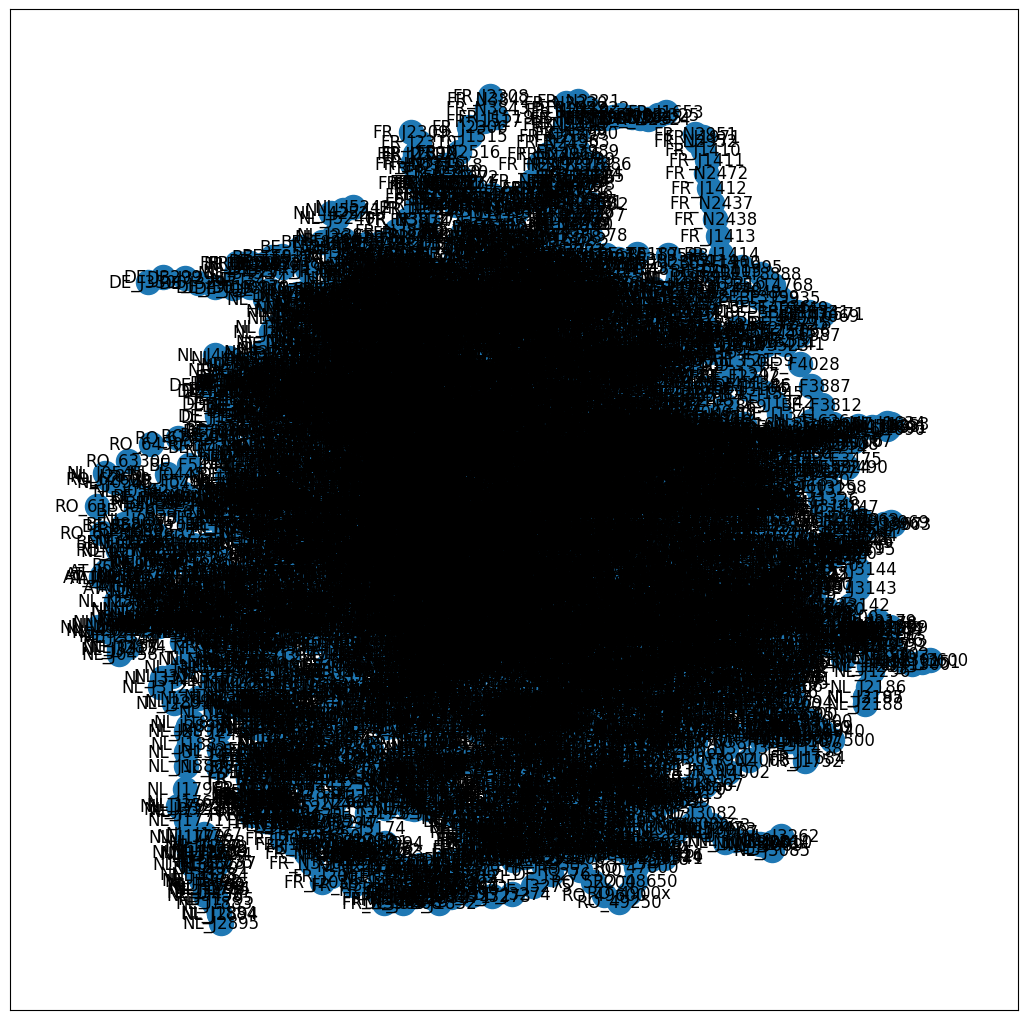

In [13]:
fig, ax = plt.subplots(figsize=(13, 13))
nx.draw_networkx(graph, ax=ax)

In [17]:
border_node_gdf = node_gdf[~node_gdf['borderpoint'].isna()]
border_node_gdf[border_node_gdf.countrycode.isin(['HR', 'HU'])][
    ['node_id', 'objectcode', 'sectionref', 'hectom', 'locode', 'function', 'borderpoint']
]



,node_id,objectcode,sectionref,hectom,locode,function,borderpoint
138,HU_J0001,J0001,HU0000100001,14332,HUXXX00001J000114332,junction,HRXXX00001J000214331
11814,HR_J0002,J0002,HR0000114331,14331,HRXXX00001J000214331,Junction,HU
11827,HR_J0008,J0008,HR0000113635,12955,HRXXX00001J000812955,Junction,RS


In [19]:
border_locode_connections = pd.merge(
    border_node_gdf[['node_id', 'borderpoint']], 
    border_node_gdf[['node_id', 'locode']], 
    left_on='borderpoint', 
    right_on='locode'
)
border_locode_connections = border_locode_connections.rename(columns={'node_id_x': 'source', 'node_id_y': 'target'})
border_locode_connections

,source,borderpoint,target,locode
0,SK_J0001,ATXXX00001J001018802,AT_J0010,ATXXX00001J001018802
1,SK_J0002,ATXXX00001J001118727,AT_J0011,ATXXX00001J001118727
2,AT_J0010,SKXXX00001J000118802,SK_J0001,SKXXX00001J000118802
3,AT_J0011,SKXXX00001J000218727,SK_J0002,SKXXX00001J000218727
4,AT_J0023,DEXXX00401J006022018,DE_J0060,DEXXX00401J006022018
...,...,...,...,...
58,BE_F5199,NLSVW0150CJ245100111,NL_J2451,NLSVW0150CJ245100111
59,BE_F6262,NLBUD00121J428800466,NL_J4288,NLBUD00121J428800466
60,BE_F6151,NLSVG00130J198900165,NL_J1989,NLSVG00130J198900165
61,BE_W3531,NLMST00150J234400000,NL_J2344,NLMST00150J234400000


In [34]:
border_node_gdf[['node_id', 'locode', 'borderpoint']].query('node_id == "SK_J0022"')

,node_id,locode,borderpoint
197,SK_J0022,SKXXX00001J002217938,HUXXX00001J001517938
198,SK_J0022,SKXXX00001J002217938,HUXXX00001J001517938


In [35]:
border_node_gdf[['node_id', 'locode', 'borderpoint']].query('locode == "HUXXX00001J001517938"')
HUXXX00003J001500000
HUXXX00001J001517938

,node_id,locode,borderpoint


In [33]:
border_locode_connections[border_locode_connections['source'].str.contains('SK_J00')]

,source,borderpoint,target,locode
0,SK_J0001,ATXXX00001J001018802,AT_J0010,ATXXX00001J001018802
1,SK_J0002,ATXXX00001J001118727,AT_J0011,ATXXX00001J001118727


In [26]:
border_graph = nx.from_pandas_edgelist(border_locode_connections)
graph.add_edges_from(border_graph.edges)

In [22]:
border_objectcode_connections = pd.merge(
    border_node_gdf[['node_id', 'borderpoint', 'objectcode', 'countrycode']],
    border_node_gdf[['node_id', 'borderpoint', 'objectcode', 'countrycode']],
    left_on=['countrycode', 'objectcode'],
    right_on=['borderpoint', 'objectcode']
)
border_objectcode_connections

,node_id_x,borderpoint_x,objectcode,countrycode_x,node_id_y,borderpoint_y,countrycode_y


In [54]:
for i, component in enumerate(nx.connected_components(graph)):
    subgraph = graph.subgraph(component)
    for edge in subgraph.edges.values():
        edge['subgraph'] = i
    for node in subgraph.nodes.values():
        node['subgraph'] = i        

In [58]:
edge_df = pd.DataFrame(data=graph.edges.values(), index=graph.edges.keys()).reset_index(names=['source', 'target'])
edge_gdf = gpd.GeoDataFrame(edge_df, crs='EPSG:4326')
node_df = pd.DataFrame(data=graph.nodes.values(), index=graph.nodes.keys()).reset_index(names=['n'])
node_gdf = gpd.GeoDataFrame(node_df, crs='EPSG:4326')

edge_gdf.to_file(export_edge_path)
node_gdf.to_file(export_node_path)